  This Notebook consists of my work to understand deep learning model buing using Keras 

# Import Libraries

In [12]:
import pandas as pd
import numpy as np 
import matplotlib
from matplotlib import pyplot
from sklearn.model_selection import KFold 

#### Check GPU Connection 

In [13]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Load Keras Modules 

In [62]:
import keras
from keras import metrics
from __future__ import print_function # to bring the print function from Python 3 into Python 2.6+
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K # to load Keras backend utility function ex. clear_session()
from keras.callbacks import TensorBoard # Enables visualizations for TensorBoard
from keras.optimizers import SGD
from keras.utils import to_categorical

# Load Data

In [21]:
from keras.datasets import mnist 

In [22]:
(train_X,train_Y),(test_X,test_Y) = mnist.load_data()

In [23]:
print("Train Data Shape : ",train_X.shape)
print("Train Label Shape : ",train_Y.shape)

Train Data Shape :  (60000, 28, 28)
Train Label Shape :  (60000,)


In [24]:
print("Test Data Shape : ",test_X.shape)
print("Test Label Shape : ",test_Y.shape)

Test Data Shape :  (10000, 28, 28)
Test Label Shape :  (10000,)


#### Reshape Data-Set To have one Channel 

In [25]:
train_X = train_X.reshape((train_X.shape[0],28,28,1))
test_X  = test_X.reshape((test_X.shape[0],28,28,1))

In [26]:
train_X.shape

(60000, 28, 28, 1)

#### Label to Categorical 1-Hot Encoding

In [27]:
train_Y = to_categorical(train_Y)
test_Y  = to_categorical(test_Y)

#### Scaling Data-Set

In [29]:
train_normalized =  train_X.astype('float32')
test_normalized  =  test_X.astype('float32')
train_normalized =  train_normalized /255.0
test_normalized  =  test_normalized /255.0

# Utility Functions

In [57]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
	# compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create Base-Line Model 

In [44]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [45]:
optimization = SGD(learning_rate=0.01,momentum=0.9)

In [50]:
model.compile(optimizer=optimization,loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(train_normalized, train_Y, epochs=10, batch_size=32, validation_data=(test_normalized, test_Y), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2936 - accuracy: 0.9089 - val_loss: 0.0668 - val_accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0559 - accuracy: 0.9834 - val_loss: 0.0572 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0444 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.0393 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.0389 - val_accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0389 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.0352 - val_accuracy

In [55]:
model.evaluate(test_normalized,test_Y,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0369 - accuracy: 0.9886


[0.03688724339008331, 0.9886000156402588]

## K-Fold Cross Validation

In [37]:
scores, histories = list() , list()

In [38]:
kfold = KFold(n_splits=5,shuffle=True,random_state=9)

In [ ]:
for train_ix , test_ix  in kfold.split(train_normalized):
    model = define_model()
    train_x,train_y,test_x,test_y=train_normalized[train_ix],train_Y[train_ix],train_normalized[test_ix],train_Y[test_ix]
    history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y), verbose=1)
    _, acc = model.evaluate(test_x, test_y, verbose=1)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
    del train_x,train_y,test_x,test_y,acc,history,model

#### Plot Learning Curves & Accuracy

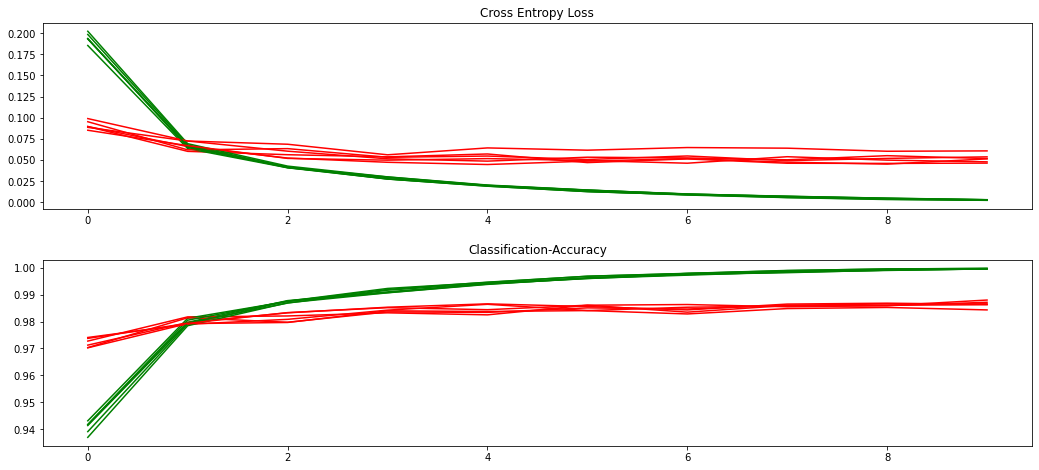

In [87]:
p = pyplot.figure(figsize=(15,7))
ax = p.add_subplot(2, 1, 1)
ax2 = p.add_subplot(2, 1, 2)
p.tight_layout(pad=3.0)
for i in range(len(histories)):
	# plot loss
    
    ax.title.set_text('Cross Entropy Loss')
    ax.plot(histories[i].history['loss'], color='green', label='Train')
    ax.plot(histories[i].history['val_loss'], color='red', label='Test')
    # plot accuracy
    
    ax2.title.set_text('Classification-Accuracy')
    ax2.plot(histories[i].history['accuracy'], color='green', label='Train')
    ax2.plot(histories[i].history['val_accuracy'], color='red', label='Test')
pyplot.show()